In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#vanila gd
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, A, b, l):
    x, k, f_val, grads, err = [x0], 0, [f(x0, A, b, l)], [grad_f(x0, A, b, l)], [np.linalg.norm(grad_f(x0, A, b ,l))]
    while k < kmax - 1:
        gradient = grad_f(x[-1], A, b, l)
        x_new = x[-1] - alpha * gradient
        x.append(x_new)
        f_val.append(f(x_new, A, b, l))
        grads.append(gradient)
        err.append(np.linalg.norm(gradient))

        if np.linalg.norm(gradient) < tolf * np.linalg.norm(grads[0]) or np.linalg.norm(x_new - x[-2]) < tolx:
            break
        k += 1
    return x, k, f_val, grads, err


#backtracking gd
def backtracking_line_search(f, grad_f, x, alpha=1.0, rho=0.7, c=1e-4, A= 0, b=0, l=0):
    while f(x - alpha * grad_f(x, A, b, l), A, b, l) > f(x, A, b, l) - c * alpha * np.dot(grad_f(x, A, b, l), grad_f(x, A, b, l)):
        alpha *= rho
    return alpha

def gradient_descent_backtracking(f, grad_f, x0, kmax, tolf, tolx, A, b, l):
    x, k, f_val, grads, err = [x0], 0, [f(x0, A, b, l)], [grad_f(x0, A, b, l)], [np.linalg.norm(grad_f(x0, A, b, l))]
    while k < kmax - 1:
        gradient = grad_f(x[-1], A, b, l)
        alpha = backtracking_line_search(f, grad_f, x[-1], A=A, b=b, l=l)
        x_new = x[-1] - alpha * gradient
        x.append(x_new)
        f_val.append(f(x_new, A, b, l))
        grads.append(gradient)
        err.append(np.linalg.norm(gradient))

        if np.linalg.norm(gradient) < tolf * np.linalg.norm(grads[0]) or np.linalg.norm(x_new - x[-2]) < tolx:
            break
        k += 1
    return x, k, f_val, grads, err


In [3]:
f1 = lambda x, A, b, lmbda: (x[0] - 3)**2 + (x[1] - 1)**2
grad_f1 = lambda x, A, b, lmbda: np.array([2 * (x[0] - 3), 2 * (x[1] - 1)])

f2 = lambda x, A, b, lmbda: 10 * (x[0] - 1)**2 + (x[1] - 2)**2
grad_f2 = lambda x, A, b, lmbda: np.array([20 * (x[0] - 1), 2 * (x[1] - 2)])

f3 = lambda x, A, b, lmbda: 0.5 * np.linalg.norm(A @ x - b)**2
grad_f3 = lambda x, A, b, lmbda: A.T @ (A @ x - b)

f4 = lambda x, A, b, lmbda: 0.5 * np.linalg.norm(A @ x - b)**2 + 0.5 * lmbda * np.linalg.norm(x)**2
grad_f4 = lambda x, A, b, lmbda: A.T @ (A @ x - b) + lmbda * x

f5 = lambda x, A, b, lmbda: x**4 + x**3 - 2*x**2 - 2*x
grad_f5 = lambda x, A, b, lmbda: 4*x**3 + 3*x**2 - 4*x - 2

In [4]:
# Running GD on Test Functions:
def run_gd(f, grad_f, x0, kmax, tolf, tolx, alpha, A, b, l):
  results_no_backtrack = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, A, b, l)
  results_backtrack = gradient_descent_backtracking(f, grad_f, x0, kmax, tolf, tolx, A, b, l)
  print("The minimum value with vanila methd is: ", results_no_backtrack[0][-1])
  print("The minimum value with backtracking is: ", results_backtrack[0][-1])
  print("backtracking iterate: ", results_backtrack[1],"   while without backtracking iterate: ", results_no_backtrack[1])
  return results_no_backtrack, results_backtrack

In [5]:
def comp2exact(a, bt, no_bt):
  x_star = a # minimum
  errors2 = [np.linalg.norm(x - x_star) for x in no_bt[0]]
  errors1 = [np.linalg.norm(x - x_star) for x in bt[0]]
  plt.plot(errors1, label='GD with Backtracking')
  plt.plot(errors2, label='GD without Backtracking')
  plt.xlabel('Iteration')
  plt.ylabel('Error ||xk - x*||')
  plt.legend()
  plt.show()
  print("error for backtracking is: ", errors1[-1],"   while error without backtracking is: ", errors2[-1])


In [6]:
#Plotting Error Vectors:
def visualization(results_no_backtrack, results_backtrack):
  plt.plot(results_no_backtrack[-1], label='GD without Backtracking')
  plt.plot(results_backtrack[-1], label='GD with Backtracking')
  plt.yscale('log')
  plt.xlabel('Iteration')
  plt.ylabel('Gradient Norm')
  plt.legend()
  plt.show()

In [7]:
#Error Comparison with True Minimum:
def err_run(results_no_backtrack):
  x_star = np.array([3, 1])
  errors = [np.linalg.norm(x - x_star) for x in results_no_backtrack[0]]
  plt.plot(errors)
  plt.xlabel('Iteration')
  plt.ylabel('Error ||xk - x*||')
  plt.show()


### function 1
 f(x1, x2) = (x1 − 3)^2 + (x2 − 1)^2


The minimum value with vanila methd is:  [2.99995427 0.99998476]
The minimum value with backtracking is:  [3.00000052 1.00000017]
backtracking iterate:  16    while without backtracking iterate:  548


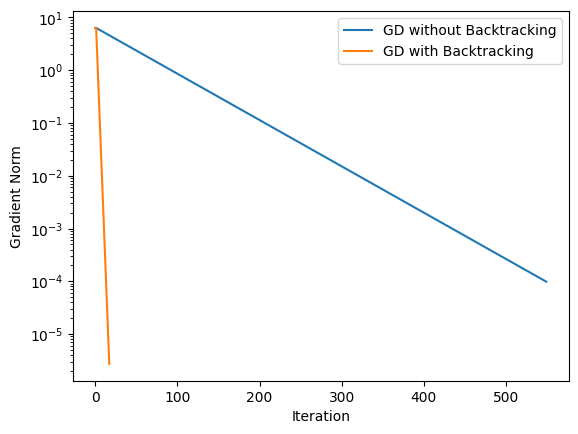

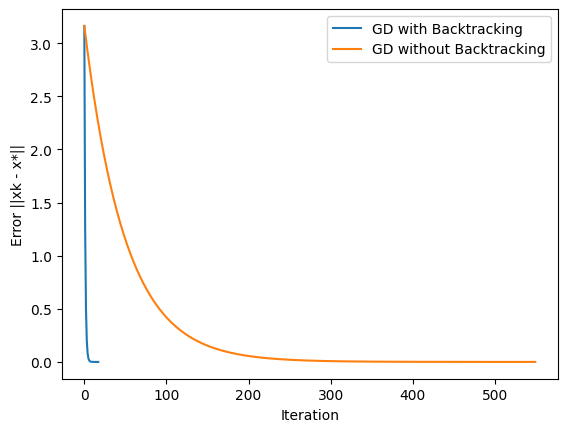

error for backtracking is:  5.432751652845308e-07    while error without backtracking is:  4.820760492540449e-05


In [ ]:
x0 = np.zeros(2)  # Adjust dimensions based on the function
kmax = 1000
tolf = 1e-6
tolx = 1e-6
alpha = 0.01  # Example step size, try different values


gd, gd_bt = run_gd(f1, grad_f1, x0, kmax, tolf, tolx, alpha, 0 , 0 ,0)
visualization(gd, gd_bt)
comp2exact(np.array([3, 1]), gd_bt, gd)

### function 2
f(x1, x2) = 10(x1 − 1)^2 + (x2 − 2)^2


The minimum value with vanila methd is:  [1.         1.99995148]
The minimum value with backtracking is:  [0.99999915 1.99999763]
backtracking iterate:  65    while without backtracking iterate:  525


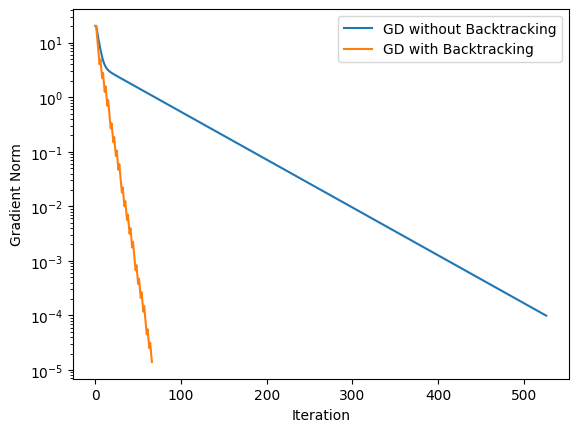

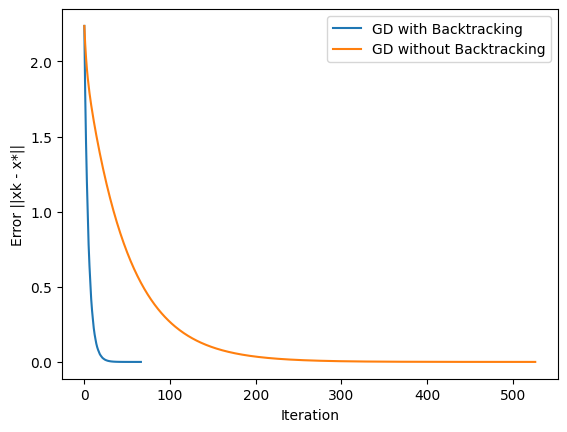

error for backtracking is:  2.5217215562187994e-06    while error without backtracking is:  4.852279509570678e-05


In [ ]:
x0 = np.zeros(2)  # Adjust dimensions based on the function
kmax = 1000
tolf = 1e-6
tolx = 1e-6
alpha = 0.01

gd, gd_bt = run_gd(f2, grad_f2, x0, kmax, tolf, tolx, alpha,0,0,0)
visualization(gd, gd_bt)
comp2exact(np.array([1, 2]), gd_bt, gd)

### function 3
f(x) = 0.5*norm2(||Ax − b||)^2

The minimum value with vanila methd is:  [1.00002847 0.99697909 1.00644926 1.00203254 0.99430356]
The minimum value with backtracking is:  [1.00006948 0.99882082 1.00190053 1.00093424 0.99823854]
backtracking iterate:  1931    while without backtracking iterate:  4740


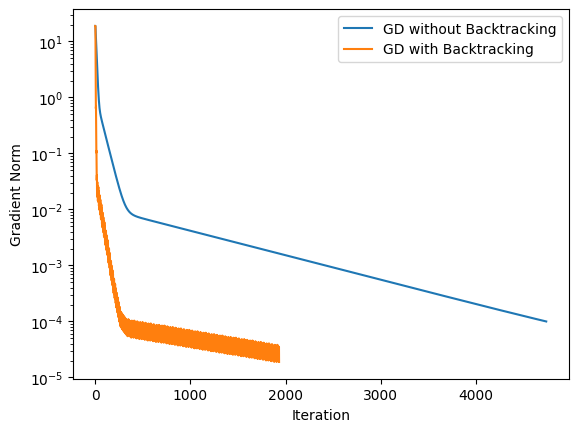

In [ ]:
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, n, increasing=True)
x_true = np.ones(n)
b = A @ x_true
n = A.shape[1]  # Number of columns in A
x0 = np.zeros(n)

kmax = 10000
tolf = 1e-6
tolx = 1e-6
alpha = 0.01

gd, gd_bt = run_gd(f3, grad_f3, x0, kmax, tolf, tolx, alpha, A, b, 0)
visualization(gd, gd_bt)

### function 4
f(x) = 0.5*norm2(||Ax − b||)^2 + 0.5 * lambda * norm2(x)^2

The minimum value with vanila methd is:  [1.00089718 1.02562914 0.9914906  0.95990191 0.9346622 ]
The minimum value with backtracking is:  [1.00243542 1.01985252 0.99046323 0.96195408 0.93873918]
backtracking iterate:  164    while without backtracking iterate:  999


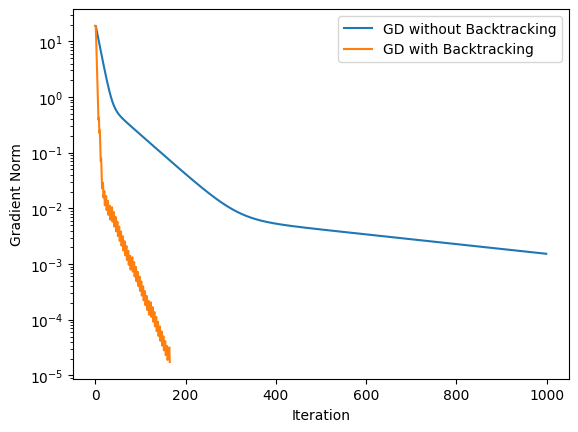

In [ ]:
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, n, increasing=True)
x_true = np.ones(n)
b = A @ x_true
lambda_values = 0.1
n = A.shape[1]  # Number of columns in A
x0 = np.zeros(n)

kmax = 1000
tolf = 1e-6
tolx = 1e-6
alpha = 0.01

gd, gd_bt = run_gd(f4, grad_f4, x0, kmax, tolf, tolx, alpha, A, b, lambda_values)
visualization(gd, gd_bt)

### function 5
f(x) = x^4 + x^3 - 2 * x^2 - 2x

The minimum value with vanila methd is:  [0.92221755]
The minimum value with backtracking is:  [0.9222243]


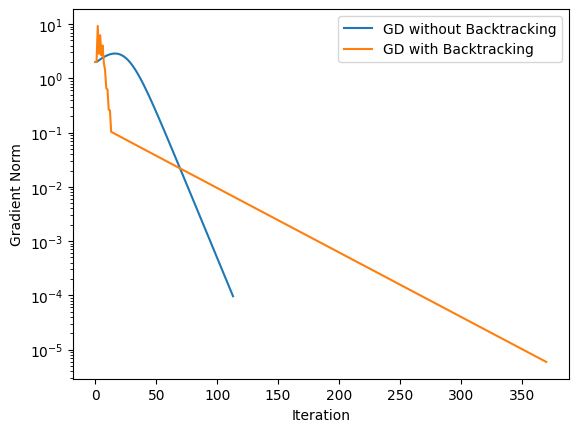

In [ ]:
x0 = np.zeros(1)  # Adjust dimensions based on the function
kmax = 1000
tolf = 1e-6
tolx = 1e-6
alpha = 0.01

gd, gd_bt = run_gd(f5, grad_f5, x0, kmax, tolf, tolx, alpha, 0,0,0)
visualization(gd, gd_bt)

##### regard to previous plot and next plot, we see algorythm without backtracking converge much faster, although from the next plot we observe that this phenomenon happen because this vanilla algorythm converge on a local minimum and with backtracking algorythm find the global minimum

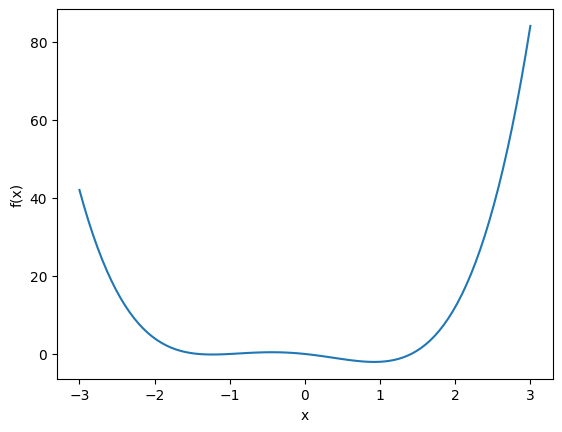

In [ ]:
#Non-Convex Function Analysis:

x = np.linspace(-3, 3, 100)
plt.plot(x, f5(x, 0,0,0))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()



##### based on the results for all the functions, with backtracking we always need less number of iteration and as a result less calculation, and also with backtracking the results are much more precise and even the possibility to stuck in local minima is much less

In [9]:
#(Optional) Contour Plots for Functions 1 and 2:
def cont_plot(f, results):
  x1, x2 = np.meshgrid(np.linspace(-1, 5, 100), np.linspace(-1, 5, 100))
  plt.contour(x1, x2, f([x1, x2], 0,0,0), levels=50)
  plt.plot(*zip(*results[0]), '-o')  # Path of GD iterations
  plt.show()

The minimum value with vanila methd is:  [2.99995427 0.99998476]
The minimum value with backtracking is:  [3.00000052 1.00000017]
backtracking iterate:  16    while without backtracking iterate:  548


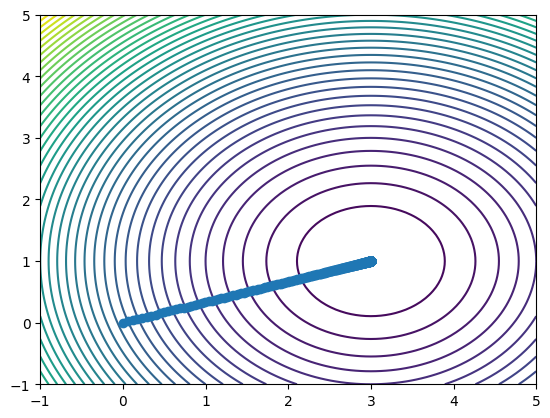

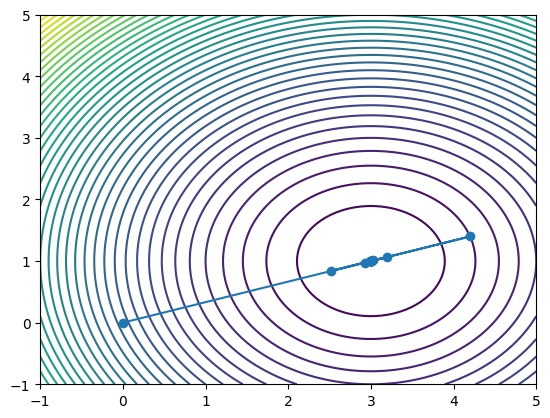

In [10]:
x0 = np.zeros(2)  # Adjust dimensions based on the function
kmax = 1000
tolf = 1e-6
tolx = 1e-6
alpha = 0.01

gd, gd_bt = run_gd(f1, grad_f1, x0, kmax, tolf, tolx, alpha, 0 , 0 ,0)
cont_plot(f1, gd)
cont_plot(f1, gd_bt)

The minimum value with vanila methd is:  [1.         1.99995148]
The minimum value with backtracking is:  [0.99999915 1.99999763]
backtracking iterate:  65    while without backtracking iterate:  525


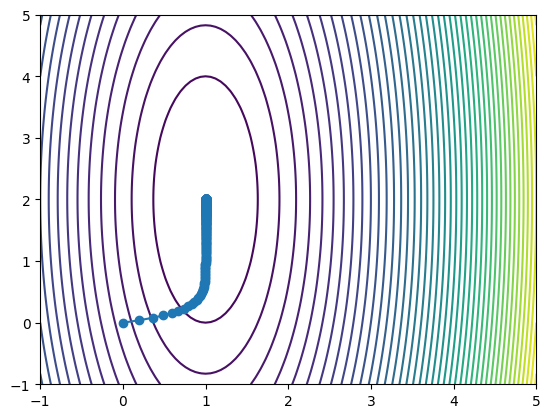

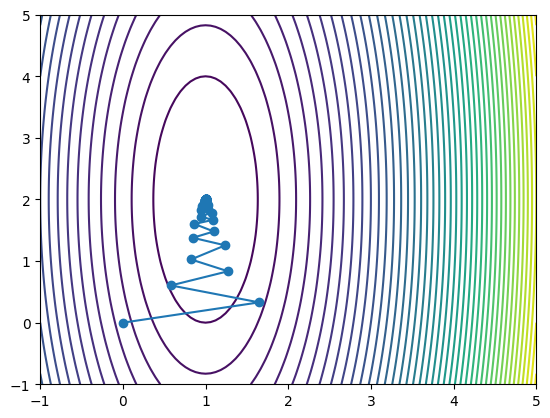

In [11]:
x0 = np.zeros(2)  # Adjust dimensions based on the function
kmax = 1000
tolf = 1e-6
tolx = 1e-6
alpha = 0.01

gd, gd_bt = run_gd(f2, grad_f2, x0, kmax, tolf, tolx, alpha, 0 , 0 ,0)
cont_plot(f2, gd)
cont_plot(f2, gd_bt)

## part 2 Optimization via Stochastic Gradient Descent

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Load MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

# Select two digits
digit1, digit2 = '3', '9'  # Example digits
mask = (y == digit1) | (y == digit2)
X_filtered, y_filtered = X[mask], y[mask]

# Convert labels to binary
y_filtered = (y_filtered == digit1).astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

# Load MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

# Function to filter digits and split the data
def preprocess_data(digit1, digit2, N_train):
    mask = (y == digit1) | (y == digit2)
    X_filtered, y_filtered = X[mask], y[mask]

    # Convert labels to binary
    y_filtered = (y_filtered == digit1).astype(int)

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

    # Limit the training set size
    indices = np.random.choice(len(X_train), N_train, replace=False)
    X_train, y_train = X_train[indices], y_train[indices]

    # Add a bias term to the data
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    return X_train, X_test, y_train, y_test


In [3]:
# Logistic Regression Loss and Gradient
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_loss(w, X, y):
    z = X @ w
    return -np.mean(y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z)))

def logistic_regression_grad(w, X, y):
    z = X @ w
    return X.T @ (sigmoid(z) - y) / len(X)

# Gradient Descent
def gradient_descent(grad_func, X, y, w_init, alpha, k_max, tolf, tolx):
    w = w_init
    for k in range(k_max):
        gradient = grad_func(w, X, y)
        w_new = w - alpha * gradient
        if np.linalg.norm(gradient) < tolf * np.linalg.norm(grad_func(w_init, X, y)):
            break
        if np.linalg.norm(w_new - w) < tolx:
            break
        w = w_new
    return w

# Stochastic Gradient Descent
def stochastic_gradient_descent(grad_func, X, y, w_init, alpha, epochs, batch_size):
    X = np.array(X)
    y = np.array(y)
    w = w_init
    for epoch in range(epochs):
        indices = np.random.permutation(len(X))
        X_shuffled, y_shuffled = X[indices], y[indices]
        for i in range(0, len(X), batch_size):
            X_batch, y_batch = X_shuffled[i:i + batch_size], y_shuffled[i:i + batch_size]
            w -= alpha * grad_func(w, X_batch, y_batch)
    return w

In [7]:
# Task 1: Test logistic regression for different digits and different training set dimensions
digits_to_test = [('8', '9'), ('5', '6'),('0', '8')]
training_set_dimensions = [100, 500, 1000, 2000]

for digit_pair in digits_to_test:
    for N_train in training_set_dimensions:
        digit1, digit2 = digit_pair
        X_train, X_test, y_train, y_test = preprocess_data(digit1, digit2, N_train)

        # GD
        w_init = np.zeros(X_train.shape[1])
        w_gd = gradient_descent(logistic_regression_grad, X_train, y_train, w_init, alpha=0.01, k_max=1000, tolf=1e-5, tolx=1e-5)

        # SGD
        w_init = np.zeros(X_train.shape[1])
        w_sgd = stochastic_gradient_descent(logistic_regression_grad, X_train, y_train, w_init, alpha=0.01, epochs=100, batch_size=64)

        # Evaluate accuracy
        y_pred_gd = sigmoid(X_test @ w_gd) >= 0.5
        accuracy_gd = accuracy_score(y_test, y_pred_gd)

        y_pred_sgd = sigmoid(X_test @ w_sgd) >= 0.5
        accuracy_sgd = accuracy_score(y_test, y_pred_sgd)

        print(f"Digits: {digit_pair}, Training Set Size: {N_train}")
        print(f"GD Accuracy: {accuracy_gd:.4f}, SGD Accuracy: {accuracy_sgd:.4f}")
        print("-----")

D:\software\installs\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Digits: ('8', '9'), Training Set Size: 100
GD Accuracy: 0.9354, SGD Accuracy: 0.9456
-----
Digits: ('8', '9'), Training Set Size: 500
GD Accuracy: 0.9590, SGD Accuracy: 0.9645
-----
Digits: ('8', '9'), Training Set Size: 1000
GD Accuracy: 0.9659, SGD Accuracy: 0.9706
-----
Digits: ('8', '9'), Training Set Size: 2000
GD Accuracy: 0.9703, SGD Accuracy: 0.9753
-----
Digits: ('5', '6'), Training Set Size: 100
GD Accuracy: 0.9492, SGD Accuracy: 0.9481
-----
Digits: ('5', '6'), Training Set Size: 500
GD Accuracy: 0.9579, SGD Accuracy: 0.9663
-----
Digits: ('5', '6'), Training Set Size: 1000
GD Accuracy: 0.9621, SGD Accuracy: 0.9625
-----
Digits: ('5', '6'), Training Set Size: 2000
GD Accuracy: 0.9670, SGD Accuracy: 0.9708
-----
Digits: ('0', '8'), Training Set Size: 100
GD Accuracy: 0.9760, SGD Accuracy: 0.9800
-----
Digits: ('0', '8'), Training Set Size: 500
GD Accuracy: 0.9800, SGD Accuracy: 0.9829
-----
Digits: ('0', '8'), Training Set Size: 1000
GD Accuracy: 0.9825, SGD Accuracy: 0.9832


#### a) In general, as the size of the training set increases, both GD and SGD tend to achieve higher accuracy. This is expected, as larger training sets provide more information
#### b) For each digit pair and training set size, the accuracy achieved by SGD is comparable to or slightly better than GD. This indicates that the stochastic nature of SGD, where each iteration processes a randomly selected batch, doesn't significantly compromise the learning quality, and it may even help the model escape local minima.
#### c) For the digit pair ('0', '8'), there is a noticeable improvement in accuracy as the training set size increases. This suggests that the model benefits from more instances of these digits during training, leading to better discrimination between '0' and '8'.
#### d) The achieved accuracies for both GD and SGD are high across different digit pairs and training set sizes. This indicates that Logistic Regression is effective in distinguishing between the selected digit pairs.
#### e) SGD accuracies sometimes show small fluctuations compared to GD, especially for smaller training set sizes. This behavior is expected because SGD processes a random subset of the data in each iteration, leading to more variability in parameter updates.
#### f) In most cases, SGD outperforms GD or achieves similar accuracy with fewer iterations. This supports the efficiency of SGD in handling large datasets where computing the gradient over the entire dataset in each iteration may be computationally expensive.